# exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
import timeit
import time
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import umap
import umap.plot

from matplotlib import rcParams
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


to look at the kmers available for each organism

In [3]:
#loading training dataset
with open('datasets/train.dataset.6mer.npy', 'rb') as open_file:
    df = np.load(open_file)
df = pd.DataFrame(df)
df.shape

(505536, 2080)

In [4]:
# loading the 6mer
six_mers = pd.read_table('datasets/6mer_columns.txt', header=None)
df.columns = six_mers[:2080]
df.columns = [col[0] for col in df.columns]

# loading the training labels
df_y = pd.read_csv('datasets/train_labels.csv')
le = preprocessing.LabelEncoder()
le.fit(df_y['genome_name'].unique())
y_index = le.transform(df_y['genome_name'].values)
df['genome_label'] = y_index
df.head()

,AAAAAA,AAAAAT,AAAAAG,AAAAAC,AAAATA,AAAATT,AAAATG,AAAATC,AAAAGA,AAAAGT,...,CCATGG,CCAGGG,CCACGG,CCTAGG,CCCAGG,CCGAGG,CCCCGG,CCGCGG,CCCGGG,genome_label
0,0.002470,0.004528,0.003292,0.000823,0.003704,0.002880,0.001646,0.001646,0.001646,0.001646,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,20
1,0.001818,0.002857,0.002077,0.001558,0.003635,0.002338,0.002338,0.001039,0.001818,0.001039,...,0.000519,0.0,0.0,0.000519,0.000260,0.0,0.0,0.0,0.0,20
2,0.003702,0.003084,0.001234,0.001851,0.002468,0.003084,0.003084,0.001851,0.001234,0.000617,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,20
3,0.001102,0.002756,0.003584,0.001378,0.003307,0.002481,0.002481,0.001102,0.001654,0.001378,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,20
4,0.004318,0.003534,0.002748,0.001701,0.003534,0.002356,0.002224,0.002617,0.003271,0.001440,...,0.000000,0.0,0.0,0.000262,0.000131,0.0,0.0,0.0,0.0,20


In [6]:
print(df_y.shape)
print(df_y['genome_name'].unique().size)
df_y['genome_name'].value_counts()

(505536, 1)
31


decoy                              446209
burkholderia_pseudomallei            3787
pseudomonas_aeruginosa               3342
klebsiella_michiganensis             3167
mycobacterium_ulcerans               2999
klebsiella_pneumoniae                2840
serratia_liquefaciens                2832
citrobacter_freundii                 2718
salmonella_enterica_typhimurium      2595
salmonella_enterica_paratyphi        2579
yersinia_enterocolitica              2416
stenotrophomonas_maltophilia         2388
mycobacterium_tuberculosis           2354
clostridioides_difficile             2249
acinetobacter_baumannii              2133
legionella_pneumophila               1814
vibrio_parahaemolyticus              1743
listeria_monocytogenes               1588
vibrio_cholerae                      1564
staphylococcus_aureus                1493
staphylococcus_pseudintermedius      1381
corynebacterium_ulcerans             1306
corynebacterium_diphtheriae          1274
neisseria_meningitidis            

In [ ]:
## labelling the genome
# le = preprocessing.LabelEncoder()
# le.fit(df_y['genome_name'].unique())
# y_index = le.transform(df_y['genome_name'].values)

In [6]:
x = df.loc[df['genome_label']=='campylobacter_jejuni']
print(x.shape)
kmer = x.sum(axis=0).to_frame()
read = x.sum(axis=1).to_frame()

(910, 2081)


C:\Users\xiaox\AppData\Local\Temp\ipykernel_4380\2939560058.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  read = x.sum(axis=1).to_frame()


In [7]:
print(kmer.head())
print(read.head())
print(kmer.sum())
print(read.sum())

               0
AAAAAA  7.738281
AAAAAT  7.398438
AAAAAG  4.179688
AAAAAC   2.96875
AAAATA  5.035156
              0
41109  1.045898
41110  1.072266
41111  1.024414
41112  1.063477
41113  1.036133
Series([], dtype: float64)
0    918.5
dtype: float16


C:\Users\xiaox\AppData\Local\Temp\ipykernel_4380\1279499375.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(kmer.sum())


# training dataset

In [7]:
sum_row = df.iloc[:,:-1].sum(axis=1)
print(sum_row.describe())
print((sum_row < 0.9).sum())

count    505536.000000
mean               NaN
std           0.000000
min           0.000000
25%           0.975098
50%           1.010742
75%           1.039062
max           1.311523
dtype: float64
22011


In [9]:
sum_col = df.iloc[:,:-1].sum(axis=0)
print(sum_col.describe())
# print((sum_col < 0.9).sum())
sum_col = sum_col.to_frame(name='Count')
sum_col['kmer'] = sum_col.index
sum_col.head()

count    2080.000000
mean             inf
std              inf
min        21.750000
25%       102.859375
50%       218.312500
75%       311.750000
max      2866.000000
dtype: float64


,Count,kmer
AAAAAA,2866.0,AAAAAA
AAAAAT,1422.0,AAAAAT
AAAAAG,902.0,AAAAAG
AAAAAC,687.0,AAAAAC
AAAATA,1257.0,AAAATA


In [ ]:
sum_col = sum_col.sort_values(by='Count')

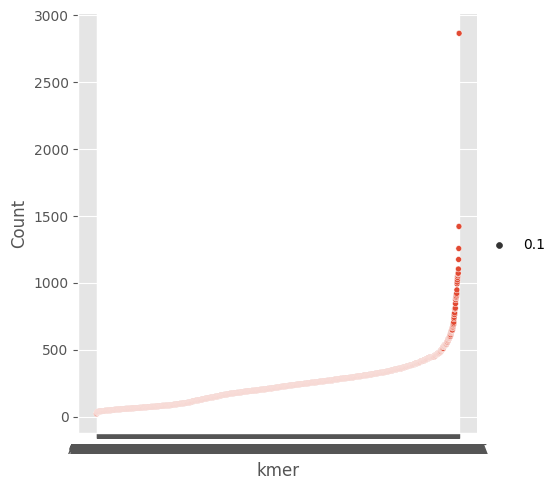

In [ ]:
sns.relplot(
    data=sum_col,
    x="kmer", y="Count", size=0.1
)

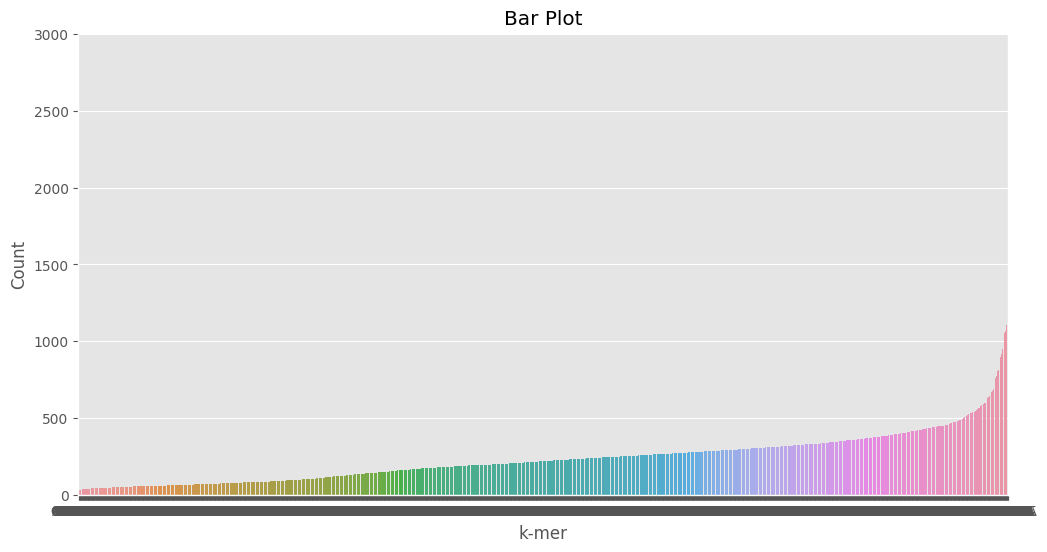

In [ ]:
# Create a bar plot
sns.barplot(x = sum_col['kmer'].values, y = sum_col['Count'].values)

# Add labels and title
plt.xlabel('k-mer')
plt.ylabel('Count')
plt.title('Bar Plot')

# Show the plot
plt.show()

In [8]:
# to remove samples with low kmer count
print(df.shape)
df = df.loc[sum_row >= 0.9,:]
print(df.shape)

(505536, 2081)
(483525, 2081)


In [20]:
y_index = y_index[sum_row >= 0.9]

In [11]:
# Sort columns by sum
# df = df.loc[:, sum_col.index]

# percentage zero
per_0 = df.groupby(['genome_label']).agg(func=lambda arr:np.count_nonzero(arr != 0) / len(arr)) 
per_0

,AAAAAA,AAAAAT,AAAAAG,AAAAAC,AAAATA,AAAATT,AAAATG,AAAATC,AAAAGA,AAAAGT,...,CCAAGG,CCATGG,CCAGGG,CCACGG,CCTAGG,CCCAGG,CCGAGG,CCCCGG,CCGCGG,CCCGGG
genome_label,,,,,,,,,,,,,,,,,,,,,
acinetobacter_baumannii,0.964218,0.979755,0.966102,0.961394,0.972222,0.970810,0.949623,0.943503,0.947740,0.941620,...,0.590866,0.367232,0.169492,0.473635,0.119586,0.153955,0.240113,0.104520,0.136064,0.079096
burkholderia_pseudomallei,0.359916,0.331925,0.413784,0.432268,0.218115,0.235807,0.314497,0.444679,0.308952,0.200422,...,0.330077,0.229469,0.425667,0.750726,0.022181,0.418801,0.869818,0.665170,0.899921,0.507526
campylobacter_jejuni,0.997802,0.998901,0.997802,0.995604,0.998901,0.997802,0.989011,0.997802,0.995604,0.985714,...,0.512088,0.262637,0.168132,0.123077,0.125275,0.130769,0.038462,0.017582,0.039560,0.014286
citrobacter_freundii,0.885083,0.899816,0.878085,0.909024,0.837201,0.807366,0.883978,0.893923,0.786004,0.736280,...,0.376796,0.540700,0.745856,0.774217,0.026519,0.750645,0.574954,0.700921,0.525230,0.360221
clostridioides_difficile,0.995552,0.996441,0.989769,0.965302,0.996886,0.990658,0.980427,0.976423,0.993772,0.981762,...,0.311388,0.201068,0.165036,0.059609,0.080516,0.161477,0.029804,0.024911,0.017349,0.013790
corynebacterium_diphtheriae,0.664835,0.819466,0.805338,0.810047,0.693093,0.686813,0.726845,0.805338,0.798273,0.739403,...,0.872057,0.697802,0.567504,0.852433,0.405024,0.720565,0.784144,0.390895,0.587127,0.109105
corynebacterium_ulcerans,0.700613,0.820061,0.845329,0.834609,0.691424,0.696784,0.723583,0.810873,0.823124,0.751914,...,0.855283,0.676110,0.758806,0.859877,0.432619,0.799387,0.834609,0.698315,0.578867,0.333078
decoy,0.942953,0.950432,0.948297,0.915363,0.947107,0.933580,0.932404,0.883656,0.947722,0.892325,...,0.760973,0.533747,0.704652,0.296542,0.458592,0.829069,0.417288,0.242860,0.064655,0.297256
klebsiella_michiganensis,0.845546,0.862919,0.881554,0.893241,0.800379,0.757107,0.830701,0.892609,0.753316,0.658876,...,0.370183,0.523373,0.822173,0.810486,0.014845,0.801642,0.725837,0.810486,0.762792,0.560328


In [12]:
bykmer = per_0.describe()
byorg = per_0.T.describe()
bykmer

,AAAAAA,AAAAAT,AAAAAG,AAAAAC,AAAATA,AAAATT,AAAATG,AAAATC,AAAAGA,AAAAGT,...,CCAAGG,CCATGG,CCAGGG,CCACGG,CCTAGG,CCCAGG,CCGAGG,CCCCGG,CCGCGG,CCCGGG
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.799974,0.821094,0.833577,0.836688,0.779365,0.765031,0.810687,0.835843,0.784268,0.736192,...,0.624789,0.444810,0.501165,0.567287,0.142201,0.517016,0.496430,0.435693,0.388674,0.271116
std,0.275976,0.274220,0.235981,0.226742,0.291326,0.282812,0.246229,0.229674,0.244056,0.255171,...,0.214777,0.160483,0.287665,0.286681,0.127145,0.287824,0.292307,0.321709,0.324963,0.252598
min,0.107036,0.140704,0.237856,0.228643,0.062814,0.075796,0.216080,0.193049,0.234925,0.139028,...,0.172321,0.201068,0.145064,0.025381,0.008481,0.130769,0.029804,0.017582,0.017349,0.013790
25%,0.817175,0.834988,0.851362,0.877606,0.769768,0.732392,0.816407,0.865661,0.769660,0.698472,...,0.410583,0.275460,0.222497,0.300620,0.042926,0.242001,0.264857,0.114020,0.077613,0.037582
50%,0.898783,0.926329,0.931304,0.924407,0.884348,0.836003,0.913517,0.913647,0.833204,0.812940,...,0.722932,0.447983,0.425667,0.644348,0.119586,0.420213,0.537238,0.390895,0.283478,0.191560
75%,0.964667,0.982573,0.969469,0.963298,0.974951,0.968213,0.961928,0.971478,0.961251,0.918326,...,0.808424,0.576738,0.754692,0.799866,0.203542,0.800515,0.752707,0.699618,0.611184,0.371671
max,0.997802,0.998901,0.997802,0.995604,0.998901,0.997802,0.989011,0.997802,0.995604,0.985714,...,0.872057,0.710952,0.976361,0.934673,0.458592,0.962597,0.973070,0.926309,0.956652,0.814359


In [13]:
byorg

genome_label,acinetobacter_baumannii,burkholderia_pseudomallei,campylobacter_jejuni,citrobacter_freundii,clostridioides_difficile,corynebacterium_diphtheriae,corynebacterium_ulcerans,decoy,klebsiella_michiganensis,klebsiella_pneumoniae,...,staphylococcus_pseudintermedius,staphylococcus_pyogenes,stenotrophomonas_maltophilia,streptococcus_agalactiae,streptococcus_equi,streptococcus_pneumoniae,streptococcus_suis,vibrio_cholerae,vibrio_parahaemolyticus,yersinia_enterocolitica
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,0.642892,0.496599,0.526083,0.673334,0.510870,0.690735,0.702708,0.592766,0.647301,0.645656,...,0.635682,0.633718,0.532271,0.619036,0.642679,0.637074,0.655088,0.682024,0.680535,0.679230
std,0.190375,0.285931,0.282939,0.168044,0.314322,0.132456,0.122449,0.253325,0.189283,0.188132,...,0.199126,0.205433,0.299999,0.222631,0.199022,0.200754,0.183025,0.155286,0.159584,0.159189
min,0.034840,0.015844,0.004396,0.026519,0.000000,0.109105,0.153139,0.026754,0.014845,0.013732,...,0.046512,0.024416,0.005025,0.021978,0.016074,0.027698,0.021277,0.084561,0.088608,0.053245
25%,0.514948,0.238381,0.282418,0.574217,0.203181,0.612245,0.637060,0.319674,0.524558,0.530898,...,0.491279,0.499735,0.264552,0.461310,0.511633,0.508835,0.545213,0.592569,0.590621,0.586522
50%,0.658663,0.487589,0.540110,0.704972,0.543817,0.711146,0.723966,0.694534,0.677353,0.666901,...,0.654070,0.660297,0.553811,0.650183,0.670051,0.668577,0.679965,0.704036,0.712888,0.708403
75%,0.797199,0.734750,0.767033,0.796409,0.792816,0.792779,0.792496,0.790710,0.789008,0.786532,...,0.795240,0.800425,0.795854,0.800366,0.804569,0.796562,0.796321,0.800769,0.799338,0.798357
max,0.985876,0.998416,1.000000,0.972376,0.998221,0.933281,0.935681,0.959544,0.984839,0.984507,...,0.991279,0.984076,0.997906,0.988095,0.982234,0.985673,0.985816,0.957719,0.962025,0.957571


Feature selection / engineering
- sum of count per sample = 0 are removed (range 0 - 1.3)
- sum of count per kmer: ranges between 21.75 and 2866

**percentage of zeros** grouped by organism and kmer
- ranges between 0 to 1
- some organisms have all 0 for certain kmer & 1 for certain kmer

1. filter by correlation
- to filter out columns that are highly similar

2. by statistical tests


In [10]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df.iloc[:,:-1]
print(X.shape)
sk = SelectKBest(score_func=f_classif, k=500)
X_new = sk.fit_transform(X, df['genome_label'])
print(X_new.shape)
pd.DataFrame({'col': X.columns, 'score':sk.scores_, 'p':sk.pvalues_}).sort_values(by='score', ascending=False)

(483525, 2080)
(483525, 500)


,col,score,p
1516,GCGCGA,44779.398154,0.000000e+00
2068,CGCGCG,39851.406897,0.000000e+00
1926,CGGCGC,38732.972087,0.000000e+00
1925,GCGCGC,37281.486341,0.000000e+00
2049,CGAGCG,35452.940295,0.000000e+00
...,...,...,...
507,AGATGC,55.327166,0.000000e+00
1781,CATTCC,43.096750,1.059335e-252
1565,GAATGC,40.236684,1.559172e-234
400,ATGGAC,39.404260,2.990308e-229


In [21]:
df_new = pd.DataFrame(X_new, columns=sk.get_feature_names_out(sk.feature_names_in_))
df_new['genome_label'] = y_index
df_new


,AAAAAT,AAAATA,AAAATT,AAAACG,AAATCG,AAAGCG,AAACGA,AAACGC,AAACCG,AATACG,...,CCTGCG,CCAGCG,CCCGCG,CGCGCG,CCGGCG,CCACGG,CCGAGG,CCCCGG,CCGCGG,genome_label
0,0.004528,0.003704,0.002880,0.001235,0.001646,0.000412,0.000823,0.000412,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,20
1,0.002857,0.003635,0.002338,0.000779,0.001039,0.000519,0.001039,0.000779,0.000519,0.000519,...,0.00000,0.000260,0.0,0.000519,0.0,0.0,0.000000,0.000000,0.0,20
2,0.003084,0.002468,0.003084,0.001234,0.000000,0.000617,0.001234,0.000000,0.000000,0.000000,...,0.00000,0.000617,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,20
3,0.002756,0.003307,0.002481,0.001102,0.001102,0.001102,0.001102,0.000827,0.000000,0.000276,...,0.00000,0.000276,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,20
4,0.003534,0.003534,0.002356,0.001178,0.000654,0.000262,0.000785,0.000524,0.000131,0.000785,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483520,0.002529,0.001896,0.001265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000632,0.0,7
483521,0.001772,0.001772,0.000886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.001772,0.000000,0.0,7
483522,0.002512,0.002512,0.000837,0.000000,0.000837,0.000000,0.000000,0.000000,0.000837,0.000837,...,0.00000,0.000837,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,7
483523,0.002939,0.001679,0.001050,0.000000,0.000000,0.000000,0.000000,0.000210,0.000000,0.000000,...,0.00021,0.000000,0.0,0.000000,0.0,0.0,0.000210,0.000000,0.0,7


In [60]:
# chi2
X = df.iloc[:,:-1]
print(X.shape)
sk = SelectKBest(score_func=chi2, k='all')
X_new = sk.fit_transform(X, df['genome_label'])
print(X_new.shape)
pd.DataFrame({'col': X.columns, 'score':sk.scores_, 'p':sk.pvalues_}).sort_values(by='score', ascending=False)

(483525, 2080)
(483525, 2080)


,col,score,p
2068,CGCGCG,2872.924794,0.000000e+00
1925,GCGCGC,2388.627243,0.000000e+00
1921,CGCCGC,1608.412311,0.000000e+00
1926,CGGCGC,1491.387245,2.710391e-295
1939,CGCGGC,1441.067818,1.416975e-284
...,...,...,...
610,AGGTAC,1.111502,1.000000e+00
1623,GAGTAC,1.008952,1.000000e+00
1875,CTATGC,1.003217,1.000000e+00
507,AGATGC,0.775225,1.000000e+00


In [63]:
# mutual info
X = df.iloc[:,:-1]
print(X.shape)
sk = SelectKBest(score_func=mutual_info_classif, k='all')
X_new = sk.fit_transform(X, df['genome_label'])
print(X_new.shape)
pd.DataFrame({'col': X.columns, 'score':sk.scores_, 'p':sk.pvalues_}).sort_values(by='score', ascending=False)

(483525, 2080)


In [22]:
sample_size = df_new.genome_label.value_counts().to_frame().min().values[0] # change to df, get min, get value
# sample_size = 500
df_train = df_new.groupby('genome_label').apply(lambda x: x.sample(sample_size))
# df_train['genome_label'].value_counts()

In [ ]:
from sklearn.model_selection import GridSearchCV

#list of items to tune
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

starting_time = timeit.default_timer()

regr = LogisticRegression(random_state=2023, solver='saga', n_jobs=-1, class_weight='balanced', max_iter=50, verbose=1)

grid_search_lr = GridSearchCV(estimator = regr,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

# the last column of our 6mer training dataset can be ignored (training labels)
grid_search_lr.fit(df_train.iloc[:,:-1].values , df_train['genome_label'].astype(int).values)
best_accuracy_lr = grid_search_lr.best_score_
best_parameter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_parameter_lr)
print("Time taken :", timeit.default_timer() - starting_time)

In [23]:
from sklearn.svm import SVC

starting_time = timeit.default_timer()

clf = SVC(kernel='rbf', probability=True)
clf.fit(df_train.iloc[:,:-1].values , df_train['genome_label'].astype(int).values)

print("Time taken :", timeit.default_timer() - starting_time)

Time taken : 401.6208015999291


In [24]:
from joblib import dump, load
dump(clf, 'models/svm_500_f.joblib') 

['models/svm_500_f.joblib']

In [43]:
from sklearn.decomposition import PCA
new_pca = PCA(n_components=1114)
pca_data = new_pca.fit_transform(df_train.iloc[:,:-1])

clf_1 = SVC(kernel='rbf', probability=True)
clf_1.fit(pca_data , df_train['genome_label'].astype(int).values)

dump(clf_1, 'models/svm_pca.joblib') 

['models/svm_pca.joblib']

# Testing

In [25]:
def precision_per_patient(patient_id, preds):
    df_true = pd.read_csv('datasets/validation/patient{}_labels.txt'.format(patient_id))
    tp,fp, tp_labels=0,0, df_true['true_label'].shape[0]
    print('my prediction(s) for patient {}:'.format(patient_id))
    print(preds)
    print('true pathogen')
    print(df_true['true_label'].values)
    #if don't predict any pathogen, it means there is only decoy in the test dataset (your prediction)
    if len(preds) == 0:
        preds = ['decoy']
    for item in np.unique(preds):
        if item in df_true['true_label'].values:
            tp+=1
        else:
            fp+=1
    #you have to predict all labels correctly, but you are penalized for any false positive
    return tp/(tp_labels+fp)

In [26]:
#snippet to load the grouth truth training labels and normalize the label predictions. 
#your trained model will predict in this space (0 to 10)
df_y = pd.read_csv('datasets/train_labels.csv')
le = preprocessing.LabelEncoder()
le.fit(df_y['genome_name'].unique())
le.classes_

array(['acinetobacter_baumannii', 'burkholderia_pseudomallei',
       'campylobacter_jejuni', 'citrobacter_freundii',
       'clostridioides_difficile', 'corynebacterium_diphtheriae',
       'corynebacterium_ulcerans', 'decoy', 'klebsiella_michiganensis',
       'klebsiella_pneumoniae', 'legionella_pneumophila',
       'listeria_monocytogenes', 'mycobacterium_tuberculosis',
       'mycobacterium_ulcerans', 'neisseria_gonorrhoeae',
       'neisseria_meningitidis', 'pseudomonas_aeruginosa',
       'salmonella_enterica_paratyphi', 'salmonella_enterica_typhimurium',
       'serratia_liquefaciens', 'staphylococcus_aureus',
       'staphylococcus_pseudintermedius', 'staphylococcus_pyogenes',
       'stenotrophomonas_maltophilia', 'streptococcus_agalactiae',
       'streptococcus_equi', 'streptococcus_pneumoniae',
       'streptococcus_suis', 'vibrio_cholerae', 'vibrio_parahaemolyticus',
       'yersinia_enterocolitica'], dtype=object)

In [ ]:
from joblib import dump, load
#load trained model
clf = load('models/svm_pca.joblib') 

In [45]:
#prediction for all patients
threshold = 0.999

all_precision = []
for patient_id in range(1,11):
    print('predicting for patient {}'.format(patient_id))
    starting_time = timeit.default_timer()
    with open('datasets/validation/patient{}.6mer.npy'.format(patient_id), 'rb') as read_file:
        df_test = np.load(read_file)
        df_test = pd.DataFrame(df_test)
    df_test = pd.DataFrame(df_test)
    df_test.columns = six_mers[:2080]
    df_test.columns = [col[0] for col in df_test.columns]
    df_test = df_test.loc[:,sk.get_feature_names_out(sk.feature_names_in_)]    
    #regr.predict relies on argmax, thus predict to every single read and you will end up with many false positives
    # y_pred = clf.predict(df_test.values)
    
    #we can use regr.predict_proba to find a good threshold and predict only for case where the model is confident.
    #here I apply 0.999 as the cutoff for my predictions, let's see how well my model will behave...
    y_predprob = clf.predict_proba(df_test)
    
    #we get only predictions larger than the threshold and if there is more than one, we take the argmax again
    final_predictions = le.inverse_transform(np.unique([np.argmax(item) for item in y_predprob  if len(np.where(item>= threshold)[0]) >=1]
                                                  ))
    #my pathogens dectected, decoy will be ignored
    final_predictions = [item for item in final_predictions if item !='decoy']
    
    precision = precision_per_patient(patient_id, final_predictions)
    print('precision: {}'.format(precision))
    all_precision.append(precision)
    print("Time taken :", timeit.default_timer() - starting_time)

predicting for patient 1


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 1:
['burkholderia_pseudomallei']
true pathogen
['staphylococcus_aureus']
precision: 0.0
predicting for patient 2


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 2:
['burkholderia_pseudomallei']
true pathogen
['staphylococcus_pyogenes']
precision: 0.0
predicting for patient 3


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 3:
['burkholderia_pseudomallei', 'corynebacterium_ulcerans']
true pathogen
['burkholderia_pseudomallei' 'corynebacterium_ulcerans']
precision: 1.0
predicting for patient 4


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 4:
['listeria_monocytogenes', 'pseudomonas_aeruginosa']
true pathogen
['pseudomonas_aeruginosa']
precision: 0.5
predicting for patient 5


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 5:
['corynebacterium_diphtheriae']
true pathogen
['corynebacterium_diphtheriae']
precision: 1.0
predicting for patient 6


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 6:
[]
true pathogen
['streptococcus_pneumoniae']
precision: 0.0
predicting for patient 7


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


my prediction(s) for patient 7:
[]
true pathogen
['mycobacterium_ulcerans']
precision: 0.0
predicting for patient 8


C:\Users\xiaox\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [36]:
#performance per patient and its final average
print([ 'patient {}: {}'.format(c,item) for c, item in enumerate(all_precision, start=1)], 'avg: {}'.format(np.mean(all_precision)))

['patient 1: 0.0', 'patient 2: 0.0', 'patient 3: 0.5', 'patient 4: 0.3333333333333333', 'patient 5: 0.5', 'patient 6: 0.0', 'patient 7: 0.25', 'patient 8: 0.0', 'patient 9: 0.0', 'patient 10: 0.25'] avg: 0.18333333333333332


# EDA

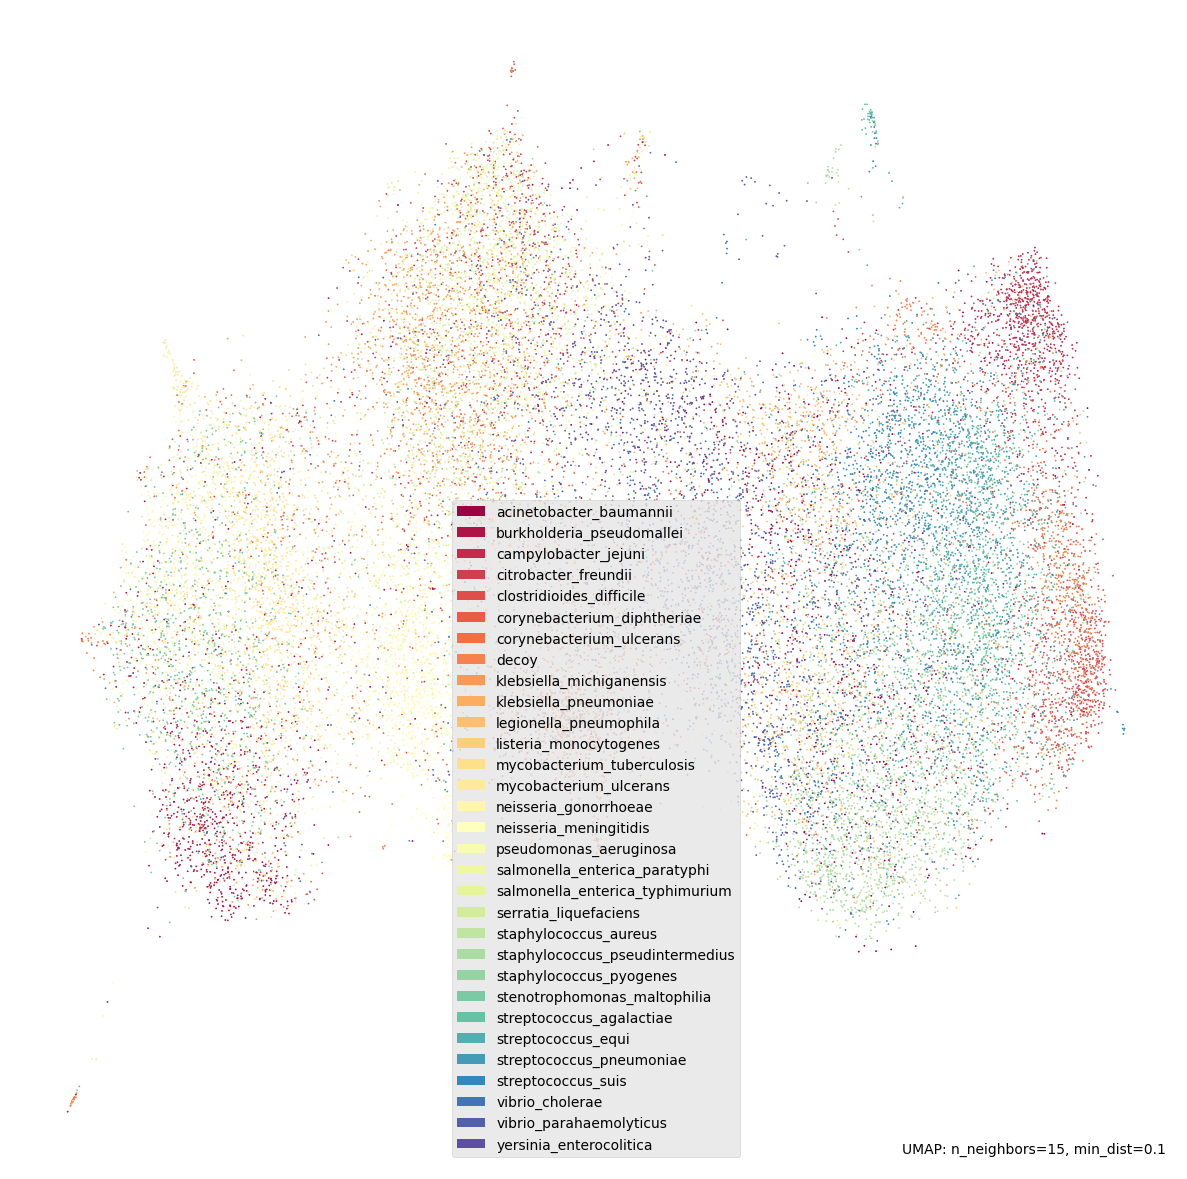

In [291]:
# the fist and last two columns of our 6mer training dataset can be ignored
mapper = umap.UMAP().fit(df_train.iloc[:,:-1])
labels_tc =le.inverse_transform(df_train['genome_label'])
ax = umap.plot.points(mapper, labels=labels_tc,  width=1500, height=1500)


In [ ]:
from sklearn.decomposition import PCA
new_pca = PCA(n_components=None)
# pca_data = new_pca.fit_transform(scaled_data)
pca_data = new_pca.fit_transform(mapper)

In [ ]:
print(pca_data.shape)

fig = plt.figure(figsize = (15,7) )
c = 0
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue = labels_tc )
plt.show()

fig = plt.figure(figsize = (15,7) )
fig.add_subplot(1, 2, 1) 
plt.plot(pca_data.singular_values_,'o-')
plt.title('Singular values')
fig.add_subplot(1, 2, 2) 
plt.plot(pca_data.explained_variance_ratio_,'o-')
plt.title('explained variance')

In [ ]:
lim = 0.9
ACC_VAR = 0
for i, var in enumerate(new_pca.explained_variance_ratio_):
    ACC_VAR+=var
    # print(var)
    if ACC_VAR > lim: 
        print(f"{i+1} components explained {lim}S of total var")
        break

# commonality

In [18]:
sample_size = 910
df_train = df.copy()
df_train['genome_label'] = y_index
df_train = df_train.groupby('genome_label').apply(lambda x: x.sample(sample_size))
df_train['genome_label'].value_counts()

0     910
16    910
29    910
28    910
27    910
26    910
25    910
24    910
23    910
22    910
21    910
20    910
19    910
18    910
17    910
15    910
1     910
14    910
13    910
12    910
11    910
10    910
9     910
8     910
7     910
6     910
5     910
4     910
3     910
2     910
30    910
Name: genome_label, dtype: int64

In [ ]:
x= df_train.loc[df_train['genome_label']==1, :-1]
variance = x.var()
sum = x.sum()

x.loc[variance<=5.960464e-08 and sum>0]

In [294]:
describe = df_train.iloc[:,:-1].groupby('genome_label').describe()

In [324]:
describe.iloc[:, describe.columns.get_level_values(1)=='std']

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
,std,std,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
genome_label,,,,,,,,,,,,,,,,,,,,,
0,0.001778,0.001544,0.000946,0.000880,0.001403,0.001403,0.000880,0.000810,0.000846,0.000772,...,0.000345,0.000423,0.000000,0.000244,0.000244,0.000000,0.000000,0.000000,0.000244,0.000244
1,0.000488,0.000345,0.000345,0.000345,0.000244,0.000345,0.000244,0.000345,0.000244,0.000244,...,0.000244,0.000345,0.000244,0.000423,0.000000,0.000488,0.000598,0.000423,0.001381,0.000598
2,0.003284,0.002502,0.001525,0.001245,0.002115,0.002573,0.001119,0.001381,0.001403,0.001036,...,0.000345,0.000423,0.000000,0.000000,0.000244,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001145,0.000810,0.000690,0.000732,0.000772,0.000690,0.000646,0.000646,0.000546,0.000488,...,0.000244,0.000598,0.000423,0.000488,0.000000,0.000423,0.000345,0.000423,0.000646,0.000488
4,0.002237,0.001984,0.001245,0.000880,0.002100,0.001637,0.000914,0.000914,0.001268,0.000977,...,0.000244,0.000345,0.000000,0.000000,0.000244,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000732,0.000690,0.000598,0.000646,0.000546,0.000488,0.000546,0.000598,0.000546,0.000488,...,0.000646,0.000977,0.000345,0.000690,0.000488,0.000423,0.000546,0.000244,0.000810,0.000345
6,0.000598,0.000646,0.000646,0.000598,0.000546,0.000488,0.000488,0.000546,0.000598,0.000546,...,0.000546,0.000732,0.000423,0.000690,0.000598,0.000488,0.000546,0.000423,0.000690,0.000488
7,0.005219,0.001843,0.001196,0.000977,0.001778,0.001505,0.001064,0.000810,0.001315,0.000772,...,0.000546,0.000646,0.000732,0.000345,0.000546,0.001092,0.000488,0.000345,0.000423,0.000488


In [327]:
std = df_train.iloc[:,:-1].groupby('genome_label').std()
std

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
genome_label,,,,,,,,,,,,,,,,,,,,,
0,0.001775,0.001544,0.000957,0.000895,0.001406,0.001397,0.000878,0.000798,0.000845,0.000753,...,0.000345,0.000460,0.000148,0.000270,0.000212,0.000138,0.000176,0.000133,0.000222,0.000258
1,0.000496,0.000377,0.000324,0.000300,0.000191,0.000318,0.000259,0.000325,0.000225,0.000188,...,0.000309,0.000358,0.000283,0.000455,0.000111,0.000500,0.000605,0.000439,0.001389,0.000631
2,0.003286,0.002498,0.001522,0.001254,0.002112,0.002570,0.001108,0.001384,0.001410,0.001041,...,0.000333,0.000407,0.000134,0.000129,0.000253,0.000129,0.000056,0.000044,0.000123,0.000081
3,0.001140,0.000822,0.000694,0.000744,0.000789,0.000681,0.000653,0.000664,0.000529,0.000500,...,0.000234,0.000591,0.000422,0.000486,0.000102,0.000456,0.000333,0.000429,0.000617,0.000487
4,0.002238,0.001980,0.001244,0.000890,0.002104,0.001639,0.000921,0.000924,0.001269,0.000967,...,0.000230,0.000329,0.000164,0.000109,0.000202,0.000169,0.000061,0.000090,0.000057,0.000104
5,0.000733,0.000672,0.000608,0.000635,0.000563,0.000492,0.000530,0.000588,0.000575,0.000475,...,0.000628,0.000963,0.000318,0.000679,0.000472,0.000431,0.000566,0.000297,0.000810,0.000319
6,0.000573,0.000635,0.000659,0.000593,0.000559,0.000494,0.000478,0.000567,0.000578,0.000533,...,0.000570,0.000721,0.000415,0.000678,0.000578,0.000481,0.000544,0.000451,0.000713,0.000470
7,0.005217,0.001839,0.001205,0.000993,0.001778,0.001507,0.001070,0.000822,0.001316,0.000769,...,0.000568,0.000635,0.000719,0.000351,0.000535,0.001100,0.000469,0.000363,0.000444,0.000508
8,0.001108,0.000869,0.000674,0.000694,0.000760,0.000555,0.000650,0.000655,0.000529,0.000427,...,0.000241,0.000656,0.000523,0.000513,0.000054,0.000504,0.000470,0.000619,0.000944,0.001497


In [340]:
std2 = std.T.describe() # 'std' as 
std2

genome_label,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,0.000442,0.000416,0.000394,0.000447,0.000400,0.000461,0.000453,0.000523,0.000457,0.000441,...,0.000439,0.000437,0.000399,0.000428,0.000444,0.000443,0.000447,0.000446,0.000445,0.000450
std,0.000187,0.000396,0.000301,0.000145,0.000304,0.000118,0.000103,0.000340,0.000203,0.000191,...,0.000190,0.000181,0.000275,0.000200,0.000178,0.000182,0.000160,0.000126,0.000121,0.000145
min,0.000107,0.000047,0.000013,0.000062,0.000000,0.000132,0.000130,0.000099,0.000047,0.000057,...,0.000109,0.000080,0.000041,0.000069,0.000046,0.000076,0.000083,0.000129,0.000141,0.000108
25%,0.000319,0.000202,0.000204,0.000348,0.000181,0.000380,0.000381,0.000326,0.000329,0.000325,...,0.000302,0.000311,0.000204,0.000290,0.000321,0.000318,0.000336,0.000358,0.000362,0.000352
50%,0.000410,0.000320,0.000327,0.000433,0.000337,0.000448,0.000446,0.000479,0.000424,0.000408,...,0.000404,0.000409,0.000340,0.000393,0.000416,0.000420,0.000422,0.000433,0.000437,0.000433
75%,0.000528,0.000494,0.000493,0.000525,0.000523,0.000528,0.000515,0.000624,0.000537,0.000511,...,0.000534,0.000534,0.000513,0.000522,0.000537,0.000540,0.000537,0.000521,0.000523,0.000525
max,0.002024,0.006722,0.003568,0.001244,0.002435,0.000992,0.001009,0.005217,0.001862,0.001752,...,0.001713,0.001904,0.002663,0.001827,0.001647,0.001723,0.001509,0.001140,0.000995,0.001496


In [341]:
mean = std2.loc['50%',:]
mean

genome_label
0     0.000410
1     0.000320
2     0.000327
3     0.000433
4     0.000337
5     0.000448
6     0.000446
7     0.000479
8     0.000424
9     0.000408
10    0.000399
11    0.000396
12    0.000374
13    0.000369
14    0.000409
15    0.000424
16    0.000348
17    0.000431
18    0.000425
19    0.000421
20    0.000370
21    0.000404
22    0.000409
23    0.000340
24    0.000393
25    0.000416
26    0.000420
27    0.000422
28    0.000433
29    0.000437
30    0.000433
Name: 50%, dtype: float64

In [346]:
filter_bool = std.T < mean
sum(filter_bool.T.sum() == 31)

16

kmers already canonical

In [239]:
base_for = "ACGT"
base_rev = "TGCA"
comp_tab = str.maketrans(base_for, base_rev)

kmer = pd.read_table("datasets/6mer_columns.txt", header=None).iloc[:2080]
count = 0
length = 2080

i = 0
length = 2080
select = []
while i < length:
    k = str(kmer.iloc[i].values)
    k_rev = k.translate(comp_tab)
    k_bool = (kmer[0]==k_rev).any()
    if (kmer[0]==k_rev).any():
        select.append(np.where(kmer[0]==k_rev)[0])
        length -= 1
    i += 1

print(i)
select  

2080


[]

In [240]:
# variance between columns
variance_bw_cols = df_train.iloc[:,:-1].var()
# variance within groups
variance_wn_groups = df_train.iloc[:,:-1].groupby('genome_label').var()

# variance between groups
var_bw_groups = np.var(df_train.iloc[:,:-1].groupby('genome_label').mean())

In [ ]:
# print(variance_wn_groups.describe())
plt.hist(variance_wn_groups, bins=100)
plt.show()

In [112]:
variance_wn_groups

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
genome_label,,,,,,,,,,,,,,,,,,,,,
0,3.149558e-06,2.384758e-06,9.165822e-07,8.012904e-07,1.976721e-06,1.950844e-06,7.715779e-07,6.373975e-07,7.140953e-07,5.671557e-07,...,1.190073e-07,2.111745e-07,2.177008e-08,7.275738e-08,4.473635e-08,1.897156e-08,3.101885e-08,1.774454e-08,4.926451e-08,6.635582e-08
1,2.456345e-07,1.419477e-07,1.047739e-07,9.006001e-08,3.637676e-08,1.008148e-07,6.698614e-08,1.053583e-07,5.077332e-08,3.528850e-08,...,9.521307e-08,1.282149e-07,8.032523e-08,2.071556e-07,1.227154e-08,2.495859e-07,3.658728e-07,1.923397e-07,1.929542e-06,3.983309e-07
2,1.080043e-05,6.238473e-06,2.315284e-06,1.573460e-06,4.460759e-06,6.602482e-06,1.227376e-06,1.915287e-06,1.987068e-06,1.082665e-06,...,1.111794e-07,1.656357e-07,1.790626e-08,1.664653e-08,6.403619e-08,1.663170e-08,3.147089e-09,1.907969e-09,1.509120e-08,6.592503e-09
3,1.299071e-06,6.754120e-07,4.820266e-07,5.539007e-07,6.230020e-07,4.639744e-07,4.266022e-07,4.408702e-07,2.797231e-07,2.496103e-07,...,5.477561e-08,3.488429e-07,1.779811e-07,2.362224e-07,1.034761e-08,2.077965e-07,1.110406e-07,1.841342e-07,3.811423e-07,2.369063e-07
4,5.010373e-06,3.920159e-06,1.547117e-06,7.924938e-07,4.428073e-06,2.687296e-06,8.473722e-07,8.542096e-07,1.611547e-06,9.352058e-07,...,5.279793e-08,1.084476e-07,2.677952e-08,1.194971e-08,4.091428e-08,2.868356e-08,3.778422e-09,8.044143e-09,3.226508e-09,1.078206e-08
5,5.377439e-07,4.509653e-07,3.693195e-07,4.028788e-07,3.168684e-07,2.424040e-07,2.809122e-07,3.462992e-07,3.311416e-07,2.252099e-07,...,3.938401e-07,9.273903e-07,1.013278e-07,4.604055e-07,2.230356e-07,1.860527e-07,3.198087e-07,8.820370e-08,6.561987e-07,1.015917e-07
6,3.277693e-07,4.034748e-07,4.341482e-07,3.521916e-07,3.122752e-07,2.440706e-07,2.288715e-07,3.216957e-07,3.345328e-07,2.841328e-07,...,3.243727e-07,5.204594e-07,1.725168e-07,4.600895e-07,3.340568e-07,2.314590e-07,2.963216e-07,2.032727e-07,5.078106e-07,2.205020e-07
7,2.721557e-05,3.382605e-06,1.452293e-06,9.858881e-07,3.161527e-06,2.271002e-06,1.145445e-06,6.762360e-07,1.732628e-06,5.916517e-07,...,3.226286e-07,4.030225e-07,5.171943e-07,1.229820e-07,2.864091e-07,1.208992e-06,2.202086e-07,1.318693e-07,1.971722e-07,2.576353e-07
8,1.228094e-06,7.545083e-07,4.546154e-07,4.818950e-07,5.770283e-07,3.077081e-07,4.230270e-07,4.295870e-07,2.799573e-07,1.821947e-07,...,5.801029e-08,4.305672e-07,2.732030e-07,2.627343e-07,2.898649e-09,2.539783e-07,2.209502e-07,3.826075e-07,8.905396e-07,2.239555e-06


In [249]:
col = (var_bw_groups > variance_wn_groups).sum(axis=0)
var_bw_groups.describe()

count    2.080000e+03
mean     1.462177e-07
std      3.759091e-07
min      2.708169e-09
25%      2.233653e-08
50%      4.487448e-08
75%      1.183229e-07
max      6.303212e-06
dtype: float64

In [114]:
variance_wn_groups = df_train.iloc[:,:-1].groupby('genome_label').var()

genome_label,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,...,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03,2.080000e+03
mean,2.306791e-07,3.302619e-07,2.455337e-07,2.208675e-07,2.527154e-07,2.264845e-07,2.154866e-07,3.890893e-07,2.503581e-07,2.312193e-07,...,2.283197e-07,2.241982e-07,2.352474e-07,2.228443e-07,2.290526e-07,2.296728e-07,2.248164e-07,2.151858e-07,2.125937e-07,2.238185e-07
std,2.521197e-07,1.527592e-06,6.194605e-07,1.548844e-07,4.962173e-07,1.208766e-07,1.017475e-07,9.920980e-07,2.820451e-07,2.615428e-07,...,2.293024e-07,2.144388e-07,4.046385e-07,2.498294e-07,2.046993e-07,2.129229e-07,1.770630e-07,1.249931e-07,1.160655e-07,1.606228e-07
min,1.138353e-08,2.192870e-09,1.658432e-10,3.810553e-09,0.000000e+00,1.743344e-08,1.688731e-08,9.768678e-09,2.162556e-09,3.277624e-09,...,1.196783e-08,6.378529e-09,1.644433e-09,4.703451e-09,2.154298e-09,5.801938e-09,6.903012e-09,1.658587e-08,1.990319e-08,1.177034e-08
25%,1.016042e-07,4.072614e-08,4.172512e-08,1.208050e-07,3.262011e-08,1.442146e-07,1.451076e-07,1.060155e-07,1.082396e-07,1.056042e-07,...,9.134408e-08,9.695560e-08,4.173019e-08,8.384068e-08,1.031795e-07,1.013082e-07,1.128956e-07,1.284699e-07,1.309547e-07,1.235722e-07
50%,1.678656e-07,1.022674e-07,1.068798e-07,1.873541e-07,1.134814e-07,2.008450e-07,1.985064e-07,2.291097e-07,1.799896e-07,1.663062e-07,...,1.635400e-07,1.669150e-07,1.157409e-07,1.541771e-07,1.733864e-07,1.766232e-07,1.780666e-07,1.874087e-07,1.912494e-07,1.877742e-07
75%,2.791135e-07,2.445266e-07,2.432652e-07,2.759717e-07,2.730736e-07,2.788951e-07,2.656384e-07,3.888937e-07,2.883825e-07,2.610844e-07,...,2.852831e-07,2.852464e-07,2.633861e-07,2.725523e-07,2.880600e-07,2.919223e-07,2.878850e-07,2.718392e-07,2.736586e-07,2.761018e-07
max,4.096956e-06,4.518518e-05,1.273306e-05,1.548497e-06,5.931047e-06,9.845893e-07,1.018831e-06,2.721557e-05,3.466577e-06,3.068251e-06,...,2.933068e-06,3.625593e-06,7.091502e-06,3.338686e-06,2.712328e-06,2.967200e-06,2.277991e-06,1.298556e-06,9.906355e-07,2.236786e-06


In [252]:
q = variance_wn_groups.quantile(axis=1, q=0.75)
df=[]
for i in range(31):
    x = variance_wn_groups.iloc[i,:]
    x = x<=q[i]
    df.append(x)
df = pd.concat(df, axis=1)

In [267]:
x = df.sum(axis=1) # sum by column
print(sum(x>15))
print(sum(x==31))

1739
292


In [281]:
q = var_bw_groups.quantile(q=0.25)
y = var_bw_groups[x==31 * (var_bw_groups > q)]
select_col = (x==31 * (var_bw_groups > q))
y.shape
# select_col

(41,)

In [168]:
thres = 0.05
kw = []
for i in range(2080):
    newdata = pd.DataFrame({"amount": df_train.iloc[:,i],
                       "lab": df_train['genome_label']})
    newdata['lab'] = newdata['lab'].astype('category')
    k = pg.kruskal(data=newdata, 
                    dv="amount", 
                    between="lab").round(3)
    kw.append(k['p-unc']>=thres) 
kw = pd.concat(kw)
kw.value_counts() # all columns are variable between groups

False    2080
Name: p-unc, dtype: int64

testing assumptions for anova
<https://ethanweed.github.io/pythonbook/05.03-anova.html>

In [ ]:
# anova
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# model = ols('amount ~ lab', data=newdata).fit()

# anova = sm.stats.anova_lm(model, typ=2)

# pg.anova(data=newdata, 
#                     dv="amount", 
#                     between="lab").round(2)

In [ ]:
## testing assumptions for anova
import scipy
from scipy import stats

KS = scipy.stats.kstest(df_train.iloc[:,1],stats.norm.cdf) # not normal
print(KS)
KS_res = scipy.stats.kstest(model.resid,stats.norm.cdf) # not normal
print(KS_res)

#############   Equal Variances TEST:

#Levene test (when distribution of samples are unknown)
import pingouin as pg

pg.homoscedasticity(data=newdata.loc[newdata['lab']!=7], 
                    dv="amount", 
                    group="lab").round(2)

In [32]:
# to drop columns with <50% percentile varianceimport statsmodels.api as sm
train_data = df_train.iloc[:,:-1]
train_data = train_data.loc[:, variance_bw_groups>= 2.384186e-07] 
train_data.shape

(28210, 1322)

In [33]:
# correlation within groups
corr_bw_groups = df_train.iloc[:,:-1].corr()
corr_bw_groups

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
0,1.000000,0.786742,0.682676,0.584433,0.698020,0.691518,0.545230,0.519188,0.633658,0.564424,...,-0.134240,-0.162181,-0.278356,-0.397901,0.044687,-0.200481,-0.363056,-0.342106,-0.361307,-0.235052
1,0.786742,1.000000,0.665955,0.552772,0.849784,0.846650,0.679639,0.661391,0.675210,0.620961,...,-0.172330,-0.188970,-0.353932,-0.445200,0.006102,-0.338270,-0.422636,-0.399578,-0.411036,-0.293789
2,0.682676,0.665955,1.000000,0.526177,0.611980,0.615354,0.550847,0.537516,0.756940,0.672018,...,-0.125498,-0.189311,-0.366002,-0.437996,0.018420,-0.354275,-0.437510,-0.411350,-0.423228,-0.307040
3,0.584433,0.552772,0.526177,1.000000,0.500090,0.502091,0.463246,0.500938,0.483791,0.446100,...,-0.129784,-0.169289,-0.349868,-0.377466,-0.008076,-0.342996,-0.418473,-0.358859,-0.406568,-0.280288
4,0.698020,0.849784,0.611980,0.500090,1.000000,0.725992,0.576816,0.537828,0.649283,0.605056,...,-0.178272,-0.188512,-0.338247,-0.436671,0.007424,-0.318995,-0.409245,-0.388640,-0.393814,-0.282763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,-0.200481,-0.338270,-0.354275,-0.342996,-0.318995,-0.304365,-0.355116,-0.370765,-0.314110,-0.316539,...,0.123384,0.193565,0.594606,0.349788,0.031646,1.000000,0.434405,0.376303,0.346923,0.304715
2076,-0.363056,-0.422636,-0.437510,-0.418473,-0.409245,-0.376152,-0.441852,-0.418324,-0.405786,-0.384515,...,0.141694,0.184174,0.478215,0.417295,-0.011834,0.434405,1.000000,0.462485,0.515986,0.358080
2077,-0.342106,-0.399578,-0.411350,-0.358859,-0.388640,-0.358255,-0.402711,-0.371669,-0.394697,-0.372005,...,0.049260,0.142542,0.413506,0.409557,-0.052791,0.376303,0.462485,1.000000,0.501914,0.524230
2078,-0.361307,-0.411036,-0.423228,-0.406568,-0.393814,-0.356857,-0.423328,-0.410615,-0.394724,-0.373408,...,0.054394,0.138270,0.367831,0.399454,-0.048187,0.346923,0.515986,0.501914,1.000000,0.408143
